In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.usetex = True
from tqdm.notebook import tqdm

In [1]:
import csv

reviews=[]
for row in csv.reader(open('C:\\Users\\Hassan\\Desktop\\bbcurdu.csv', encoding = "utf-8")):
    reviews.append(row)
reviews

[['\ufeff"نیشنل اسٹیڈیم کراچی میں ہونے والے میچ میں کراچی کنگز نے ملتان سلطانز کے خلاف ٹاس جیت کر بالنگ کا فیصلہ کیا ہے۔ یہ میچ جیتنے والی ٹیم فائنل میں پہنچ جائے گی اور ہارنے والی ٹیم لاہور یا پشاور کی فاتح ٹیم کے ساتھ کھیلے گی۔ملتان سلطانز کی ٹیم میں شان مسعود (کپتان)، ذیشان اشرف، ایڈم لیتھ، ریلے روسو، روی بوپارہ، خوشدل شاہ، شاہد آفریدی، سہیل تنویر، محمد الیاس، عمران طاہر اور محمد عرفان شامل ہیں۔کراچی کنگز کی ٹیم میں عماد وسیم (کپتان)، بابر اعظم، شرجیل خان، الیکس ہیلز، وین پارنیل، چیدوک والٹن، محمد عامر، وقاص مقصود، ردرفورڈ، افتخار احمد اور ارشد اقبال شامل ہیں۔"'],
 ['کراچی پولیس کے ترجمان کی جانب سے جاری اعلامیے کے مطابق نیشنل اسٹیڈیم سمیت تمام متعلقہ روٹس اور ہوٹلوں پر پولیس کی بھاری نفری اور کمانڈوزکھلاڑیوں کی سکیورٹی کے لیے موجود رہیں گے، کراچی پولیس کے 24 سینئر افسران سمیت 59 ڈی ایس پیز، 474 نان گزیٹڈ افسران،4275 ہیڈکانسٹیبل ، کانسٹیبل ، ریپڈ رسپانس فورس کے 345 جوان اور اسپیشل سیکیورٹی یونٹ کے 1018 کمانڈوز تعینات کیے گئے ہیں۔نیشنل اسٹیڈیم کراچی اور ہوٹلوں پر اسپیشل برانچ کے سادہ

In [2]:
import spacy
from spacy.lang.ur import Urdu
parser = Urdu()
from spacy.lang.ur.stop_words import STOP_WORDS
import nltk
stopwords = set(nltk.corpus.stopwords.words('urdu'))
#nltk.download('wordnet')
from nltk.corpus import wordnet as wn
import lemma

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.text.isdigit():
            lda_tokens.append('NUM')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

def get_lemma(word):
    word = lemma.lemmatize(word)
    return word

final=[]     #In this list all of our pre processed data will be stored
for line in reviews:  #Break sentence into list words
    for words in line:
        tokens = tokenize(words)
        tokens = [token for token in tokens if len(token) > 3]
        tokens = [token for token in tokens if token not in stopwords]
        tokens = [get_lemma(token) for token in tokens]
        final.append(tokens)
print(final)

[['\ufeff"نیشنل', 'اسٹیڈیم', 'کراچی', 'کراچی', 'کنگز', 'ملتان', 'سلطانز', 'خلاف', 'بالنگ', 'فیصلہ', 'جیتنے', 'فائنل', 'پہنچ', 'ہارنا', 'لاہور', 'پشاور', 'فاتح', 'کھیلا', 'گی۔ملتان', 'سلطانز', 'مسعود', 'کپتان', 'ذیشان', 'اشرف', 'ایڈم', 'لیتھ', 'ریلا', 'روسو', 'بوپارہ', 'خوشدل', 'شاہد', 'آفرید', 'سہیل', 'تنویر', 'الیاس', 'عمران', 'طاہر', 'عرفان', 'شامل', 'ہیں۔کراچ', 'کنگز', 'عماد', 'وسیم', 'کپتان', 'بابر', 'اعظم', 'شرجیل', 'الیکس', 'ہیلز', 'پارنیل', 'چیدوک', 'والٹن', 'عامر', 'وقاص', 'مقصود', 'ردرفورڈ', 'افتخار', 'احمد', 'ارشد', 'اقبال', 'شامل'], ['کراچی', 'پولیس', 'ترجمان', 'جانب', 'جاری', 'اعلامیے', 'مطابق', 'نیشنل', 'اسٹیڈیم', 'سمیت', 'متعلقہ', 'روٹس', 'ہوٹل', 'پولیس', 'بھاری', 'نفری', 'کمانڈوزکھلاڑ', 'سکیورٹی', 'موجود', 'کراچی', 'پولیس', 'سینئر', 'افسران', 'سمیت', 'گزیٹڈ', 'افسران،4275', 'ہیڈکانسٹیبل', 'کانسٹیبل', 'ریپڈ', 'رسپانس', 'فورس', 'جوان', 'اسپیشل', 'سیکیورٹی', 'یونٹ', 'کمانڈوز', 'تعین', 'ہیں۔نیشنل', 'اسٹیڈیم', 'کراچی', 'ہوٹل', 'اسپیشل', 'برانچ', 'سادہ', 'لباس', 'اہلکار', 'تعد

In [3]:
from gensim import corpora
dictionary = corpora.Dictionary(final)
print(dictionary)

Dictionary(1388 unique tokens: ['آفرید', 'احمد', 'ارشد', 'اسٹیڈیم', 'اشرف']...)


In [4]:
print(dictionary.token2id)

{'آفرید': 0, 'احمد': 1, 'ارشد': 2, 'اسٹیڈیم': 3, 'اشرف': 4, 'اعظم': 5, 'افتخار': 6, 'اقبال': 7, 'الیاس': 8, 'الیکس': 9, 'ایڈم': 10, 'بابر': 11, 'بالنگ': 12, 'بوپارہ': 13, 'تنویر': 14, 'جیتنے': 15, 'خلاف': 16, 'خوشدل': 17, 'ذیشان': 18, 'ردرفورڈ': 19, 'روسو': 20, 'ریلا': 21, 'سلطانز': 22, 'سہیل': 23, 'شامل': 24, 'شاہد': 25, 'شرجیل': 26, 'طاہر': 27, 'عامر': 28, 'عرفان': 29, 'عماد': 30, 'عمران': 31, 'فائنل': 32, 'فاتح': 33, 'فیصلہ': 34, 'لاہور': 35, 'لیتھ': 36, 'مسعود': 37, 'مقصود': 38, 'ملتان': 39, 'والٹن': 40, 'وسیم': 41, 'وقاص': 42, 'پارنیل': 43, 'پشاور': 44, 'پہنچ': 45, 'چیدوک': 46, 'کراچی': 47, 'کنگز': 48, 'کپتان': 49, 'کھیلا': 50, 'گی۔ملتان': 51, 'ہارنا': 52, 'ہیلز': 53, 'ہیں۔کراچ': 54, '\ufeff"نیشنل': 55, 'swat': 56, 'اسپیشل': 57, 'اعلامیے': 58, 'افسران': 59, 'افسران،4275': 60, 'اقدام': 61, 'امان': 62, 'انجام': 63, 'انٹرنیشنل': 64, 'اوق': 65, 'آمد': 66, 'آمدورفت': 67, 'آنا': 68, 'اہلکار': 69, 'بالادست': 70, 'بحال': 71, 'برانچ': 72, 'بھاری': 73, 'تحفظ': 74, 'ترجمان': 75, 'تعداد': 

In [21]:
#corpus = [dictionary.doc2bow(text) for text in final]
#print(corpus)
from sklearn.feature_extraction.text import CountVectorizer

texts = [row[0] for row in reviews]
texts = [" ".join(tokenize(text)) for text in texts]

vectorizer = CountVectorizer()
tf = vectorizer.fit_transform(texts)

vocabulary = vectorizer.vocabulary_
print(vocabulary)


{'نیشنل': 1267, 'اسٹیڈیم': 88, 'کراچی': 1564, 'میں': 1216, 'ہونے': 1764, 'والے': 1289, 'میچ': 1210, 'کنگز': 1618, 'نے': 1272, 'ملتان': 1162, 'سلطانز': 761, 'کے': 1673, 'خلاف': 558, 'ٹاس': 1335, 'جیت': 506, 'کر': 1561, 'بالنگ': 249, 'کا': 1541, 'فیصلہ': 993, 'کیا': 1657, 'ہے': 1781, 'یہ': 1796, 'جیتنے': 507, 'والی': 1288, 'ٹیم': 1354, 'فائنل': 948, 'پہنچ': 1447, 'جائے': 444, 'گی': 1713, 'اور': 172, 'ہارنے': 1723, 'لاہور': 1025, 'یا': 1782, 'پشاور': 1408, 'کی': 1656, 'فاتح': 951, 'ساتھ': 727, 'کھیلے': 1646, 'شان': 831, 'مسعود': 1117, 'کپتان': 1632, 'ذیشان': 629, 'اشرف': 107, 'ایڈم': 225, 'لیتھ': 1051, 'ریلے': 698, 'روسو': 665, 'روی': 673, 'بوپارہ': 310, 'خوشدل': 565, 'شاہ': 834, 'شاہد': 835, 'آفریدی': 26, 'سہیل': 805, 'تنویر': 410, 'محمد': 1091, 'الیاس': 128, 'عمران': 928, 'طاہر': 890, 'عرفان': 914, 'شامل': 830, 'ہیں': 1780, 'عماد': 923, 'وسیم': 1304, 'بابر': 234, 'اعظم': 113, 'شرجیل': 842, 'خان': 544, 'الیکس': 129, 'ہیلز': 1777, 'وین': 1326, 'پارنیل': 1366, 'چیدوک': 1492, 'والٹن': 1287,

In [22]:
import numpy as np

docs = []
for row in tf.toarray():
    present_words = np.where(row != 0)[0].tolist()
    present_words_with_count = []
    for word_idx in present_words:
        for count in range(row[word_idx]):
            present_words_with_count.append(word_idx)
    docs.append(present_words_with_count)

print(docs)

[[26, 48, 69, 88, 107, 113, 116, 121, 128, 129, 172, 172, 172, 225, 234, 249, 310, 410, 444, 506, 507, 544, 558, 565, 629, 642, 665, 673, 698, 727, 761, 761, 805, 830, 830, 831, 834, 835, 842, 890, 905, 914, 923, 928, 948, 951, 993, 1025, 1051, 1091, 1091, 1091, 1117, 1156, 1162, 1162, 1210, 1210, 1216, 1216, 1216, 1216, 1216, 1267, 1272, 1287, 1288, 1288, 1289, 1304, 1308, 1326, 1335, 1354, 1354, 1354, 1354, 1354, 1366, 1408, 1447, 1492, 1541, 1561, 1564, 1564, 1564, 1618, 1618, 1632, 1632, 1646, 1656, 1656, 1656, 1657, 1673, 1673, 1713, 1713, 1723, 1764, 1777, 1780, 1780, 1781, 1782, 1796], [10, 23, 23, 23, 23, 23, 24, 88, 88, 88, 96, 96, 96, 114, 120, 120, 122, 130, 133, 133, 144, 155, 172, 172, 172, 172, 172, 172, 178, 181, 200, 205, 205, 209, 248, 261, 269, 318, 318, 323, 330, 377, 383, 383, 398, 402, 407, 425, 453, 453, 459, 493, 514, 586, 610, 625, 645, 645, 670, 671, 692, 692, 693, 693, 700, 729, 748, 774, 774, 798, 798, 803, 815, 825, 825, 826, 826, 845, 864, 867, 893, 933, 94

In [23]:
D = len(docs)        # number of documents
V = len(vocabulary)  # size of the vocabulary 
T = 3               # number of topics

alpha = 1 / T         # the parameter of the Dirichlet prior on the per-document topic distributions
beta = 1 / T        # the parameter of the Dirichlet prior on the per-topic word distribution


In [24]:

z_d_n = [[0 for _ in range(len(d))] for d in docs]  # z_i_j
theta_d_z = np.zeros((D, T))
phi_z_w = np.zeros((T, V))
n_d = np.zeros((D))
n_z = np.zeros((T))

## Initialize the parameters
# m: doc id
for d, doc in enumerate(docs):  
    # n: id of word inside document, w: id of the word globally
    for n, w in enumerate(doc):
        # assign a topic randomly to words
        z_d_n[d][n] = n % T
        # get the topic for word n in document m
        z = z_d_n[d][n]
        # keep track of our counts
        theta_d_z[d][z] += 1
        phi_z_w[z, w] += 1
        n_z[z] += 1
        n_d[d] += 1

for iteration in tqdm(range(10)):
    for d, doc in enumerate(docs):
        for n, w in enumerate(doc):
            # get the topic for word n in document m
            z = z_d_n[d][n]

            # decrement counts for word w with associated topic z
            theta_d_z[d][z] -= 1
            phi_z_w[z, w] -= 1
            n_z[z] -= 1

            # sample new topic from a multinomial according to our formular
            p_d_t = (theta_d_z[d] + alpha) / (n_d[d] - 1 + T * alpha)
            p_t_w = (phi_z_w[:, w] + beta) / (n_z + V * beta)
            p_z = p_d_t * p_t_w
            p_z /= np.sum(p_z)
            new_z = np.random.multinomial(1, p_z).argmax()

            # set z as the new topic and increment counts
            z_d_n[d][n] = new_z
            theta_d_z[d][new_z] += 1
            phi_z_w[new_z, w] += 1
            n_z[new_z] += 1

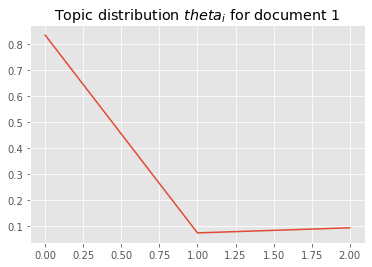

In [25]:
i = 1
plt.plot(theta_d_z[i]/ sum(theta_d_z[i]));
plt.title("Topic distribution $theta_i$ for document {}".format(i));

In [26]:
inv_vocabulary = {v: k for k, v in vocabulary.items()}
n_top_words = 50
for topic_idx, topic in enumerate(phi_z_w):
    message = "Topic #%d: " % topic_idx
    message += " ".join([inv_vocabulary[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)

Topic #0: میں کی کے ہے سے کہ نے کا ہیں num اور ٹیم کراچی کر لیے کیلیے ایس میچ میچز پشاور کو پی زلمی پہلے محمد کنگز کھلاڑیوں شامل لیکن مرحلے گی اسٹیڈیم انھوں گے رہے سلطانز ہم ایل کیا بھی گیا قلندرز ریاض ملتان نہیں پولیس کپتان موجود وہاب گا
Topic #1: کے میں پر بھی کو کی نے اور کا کہا ساتھ وہ ہیں ان ایک اس ہوئے کہ گے کرتے ہے والی کردار اپنی ہوں بعد کرنے خان ادا یا لاہور رہے تو وجہ کارکردگی کام دیا پی انہوں پاکستانی گا وقت پشن لیے طور والے دوران پیش جب ہمارے
Topic #2: ہے کی میں کے اور سے اس نے کہ کیا ہیں ایک لیے یہ ہی نہیں طرح کو اپنے کا تھا بی انہیں ٹی کسی ڈرامے بھارتی جس کہا بات پاکستان کوئی گیا ویب اسے جاتا تک ضرورت جو اب سیریز عباسی ہوئے کرنے بک شمعون کچھ بھی مواد num
